<a href="https://colab.research.google.com/github/marciliojrr/PDI/blob/main/PDI_Trabalho_pr%C3%A1tico_2_Marc%C3%ADlio_J%C3%BAnior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução ao Processamento Digital de Imagens  
---
Professor: Leonardo  
Módulo 2 do Trabalho Prático - Data de entrega: 24/11/2021  
Aluno: Marcílio Júnior - Matrícula: 11413589  

---
####Descrição do trabalho:  
Neste trabalho, a DCT-2D (direta e inversa) deve ser desenvolvida utilizando as equações estudadas em sala de aula, sem o uso de bibliotecas prontas para esse fim.
* 1. Dada uma imagem I em níveis de cinza, de dimensões RxC, desenvolva um programa para:  
     * 1.1 Exibir o módulo normalizado da DCT de I, sem o nível DC, e o valor (numérico) do nível DC.  
     * 1.2. Encontrar e exibir uma aproximação de I obtida preservando o coeficiente DC e os n coeficientes AC mais importantes de I, e zerando os demais. O parâmetro n é um inteiro no intervalo [0, RxC-1]. 
* 2. Desenvolva um programa para reforçar os graves, no domínio DCT, de um sinal s, em formato .wav, com N amostras. O reforço será obtido pela multiplicação do coeficiente de frequência (adimensional) k por um valor y dado por:
\begin{equation}
\mathrm{Y}=g \frac{1}{\sqrt{1+\left(\frac{k}{f c}\right)^{2 n}}}+1
\end{equation}  
Em que g controla o ganho (g = 0.5 é 50% de ganho máximo), fc é a frequência de corte (adimensional) e n é a ordem do filtro.

Observações:
1. O trabalho pode ser feito em grupo, com até cinco componentes. Um membro do grupo deve enviar o nome de todos os componentes em um e-mail com assunto “Grupo de PDI”. para leonardo@ci.ufpb.br.  
2. Para integralização das notas, o trabalho deve ser apresentado na data e horário marcados para cada grupo, juntamente com um relatório em formato PDF enviado previamente, contendo pelo menos as seguintes seções: introdução (contextualização e apresentação do tema, fundamentação teórica, objetivos), materiais e métodos (descrição das atividades desenvolvidas e das ferramentas e conhecimentos utilizados), resultados, discussão (problemas e dificuldades encontradas, comentários críticos sobre os resultados) e conclusão. O relatório e código-fonte devem ser enviados até o início da primeira aula de apresentação dos trabalhos.  
3. Cada componente do grupo deve estar familiarizado com o trabalho desenvolvido pelos 
demais componentes do seu grupo, e todos devem comparecer à apresentação dos 
trabalhos

#0. Importação de dependências e criação das funções
##0. Importing dependencies and creating roles

In [128]:
# Atualizando dependência para usar paralelismo ao usar o @jit.
# Updating dependencies to use parallelism when using @jit.
!pip install --upgrade tbb


In [129]:
# Importando dependênias.
# Importing dependencies.

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, cos, log10, log, arccos
from PIL import Image
import soundfile as sf
from numba import jit
from IPython.display import Audio


In [130]:
'''
Alguns métodos entrarão em desuso e precisarão ser implementados novamente.
Neste momento, esses avisos estão aparecendo na função "comp_change()".
Some methods will fall out of favor and will need to be implemented again.
Right now, these warnings are showing up in the "comp_change()" function.
'''
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)


## Funções DCT e IDCT
### DCT and IDCT functions
---
DCT de $x[n]:$
$$
X[k]=\left(\frac{2}{N}\right)^{1 / 2} c_{k} \sum_{n=0}^{N-1} x[n] \cos \left[2 \pi \frac{k}{2 N} n+\frac{k \pi}{2 N}\right], k=0,1, \ldots, N-1
$$

---
Transformada DCT inversa (IDCT) de $X[k]:$
$$
x[n]=\left(\frac{2}{N}\right)^{1 / 2} \sum_{k=0}^{N-1} c_{k} X[k] \cos \left[2 \pi \frac{k}{2 N} n+\frac{k \pi}{2 N}\right], n=0,1, \ldots, N-1
$$

---
Definição do termo $c_k$:
$$
c_{k}= \begin{cases}(1 / 2)^{1 / 2} & \text {, para } k=0 \\ 1 & \text {, para } k=1,2, \ldots N-1\end{cases}
$$


##0.1. Função DCT
0.1. DCT function

In [131]:
# Definição da função para cálculo da DCT.
# Definition of the function for calculating the DCT.

@jit(nopython=True, parallel=True)
def dct1d(x):
    N = x.size
    X = np.zeros(N)

    for k in range(N):
        if k == 0:
            ck = sqrt(0.5)
        else:
            ck = 1
        accumulator = 0
        for n in range(N):
            accumulator += x[n] * cos((2.0 * pi * (k / (2.0 * N) * n)) + ((k * pi) / (2.0 * N)))

        X[k] = sqrt(2.0 / N) * ck * accumulator

    return X


##0.2. Função IDCT
0.2. IDCT function

In [132]:
# Definição da função para cálculo da IDCT.
# Definition of the function for calculating the IDCT.

@jit(nopython=True, parallel=True)
def idct1d(X):
    N = X.size
    x = np.zeros(N)

    for n in range(N):
        accumulator = 0
        for k in range(N):
            if k == 0:
                ck = sqrt(0.5)
            else:
                ck = 1
            accumulator += ck * X[k] * cos((2.0 * pi * (k / (2.0 * N)) * n) + (k * pi) / (2.0 * N))
        
        x[n] = sqrt(2.0 / N) * accumulator

    return x


##0.1.3. Testando funções
0.3. Testing Functions

In [133]:
# Criando um array com valores aleatórios.
# Creating an array with random values.
x = np.random.random_sample(5)

X_DCT = dct1d(x)
X_IDCT = idct1d(X_DCT)

print(f'''{x}
{X_IDCT}''')


[0.09928851 0.37650165 0.476859   0.31070556 0.59369135]
[0.09928851 0.37650165 0.476859   0.31070556 0.59369135]


#1. Tratando imagem
###1. Treating image

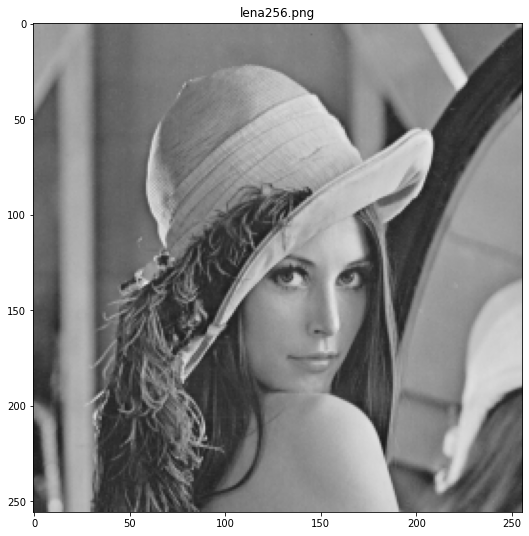

In [134]:
# Abrindo imagem a ser tratada e plotando.
# Opening image to be treated and plotting.
img = Image.open('lena256.png')
plt.figure(figsize=[90, 9])
plt.imshow(img, cmap='gray')
plt.title('lena256.png')
plt.show()


In [135]:
# Salvando dados da imagem como array.
# Saving image data as array.
img = np.asarray(img)
imgDCT = np.zeros(img.shape)

# Aplicando DCT 1D nas linhas da imagem.
# Applying 1D DCT to image lines.
for i, line in enumerate(img):
    imgDCT[i] = dct1d(line)

# Fazendo a transposta da imagem. Linhas viram colunas.
# Transposing the image. Rows become columns.
imgDCT = imgDCT.T

# Aplicando DCT 1D nas colunas da imagem.
# Applying 1D DCT to image columns.
for i, line in enumerate(imgDCT):
    imgDCT[i] = dct1d(line)

# Retornando a imagem para a forma original.
# Returning the image to its original form.
imgDCT = imgDCT.T


 - Valor (aproximado) do nível DC: 31883.61



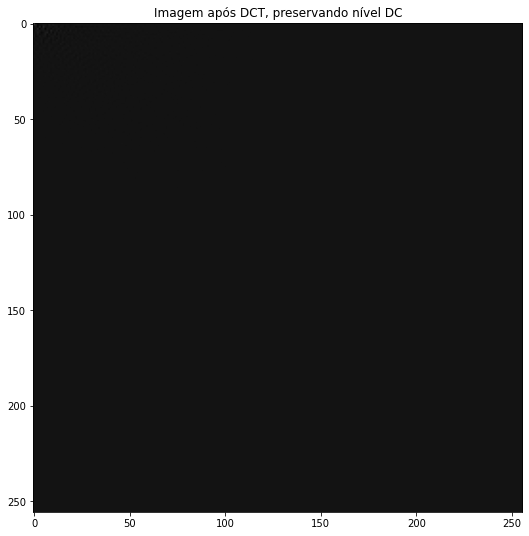

In [136]:
# Pegando o valor DC.
# Getting the DC value.
dc_value = imgDCT[0][0]

# Exibindo a imagem após aplicação da DCT.
# Displaying the image after applying the DCT.
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT, cmap='gray')
plt.title("Imagem após DCT, preservando nível DC")

print(f' - Valor (aproximado) do nível DC: {dc_value:.2f}\n')


Text(0.5, 1.0, 'Imagem após DCT, removendo nível DC')

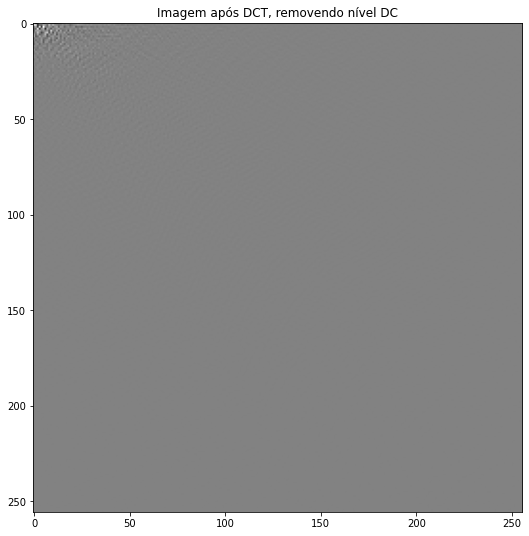

In [137]:
# Removendo valor DC.
# Removing DC value.
imgDCT[0][0] = 0
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT, cmap='gray')
plt.title("Imagem após DCT, removendo nível DC")


Text(0.5, 1.0, 'Imagem após DCT normalizada, usando módulos dos valores, sem nível DC')

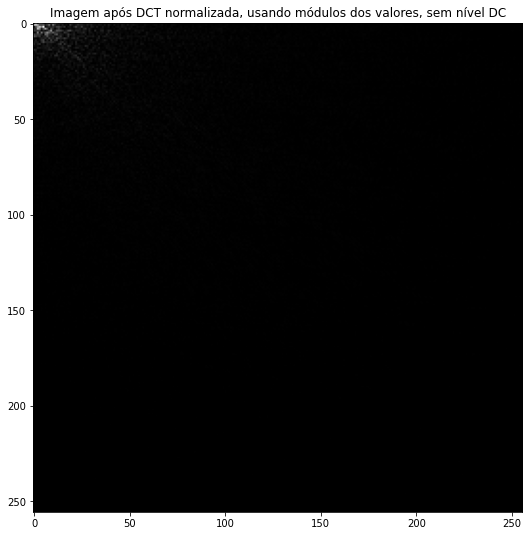

In [138]:
# Copia da imagem pós DCT para normalização.
# Copy post DCT image for normalization.
imgDCT_norm = imgDCT.copy()

# Normalizando fazendo valores serem absolutos.
# Normalizing making values absolute.
for i in range(imgDCT_norm.shape[0]):
    for j in range(imgDCT_norm.shape[1]):
        imgDCT_norm[i][j] = abs(imgDCT_norm[i][j])

# Plotando.
# Plotting.
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT_norm, cmap='gray')
plt.title("Imagem após DCT normalizada, usando módulos dos valores, sem nível DC")


Text(0.5, 1.0, 'Imagem após DCT normalizada usando log(|DCT| + 1), sem nível DC, ')

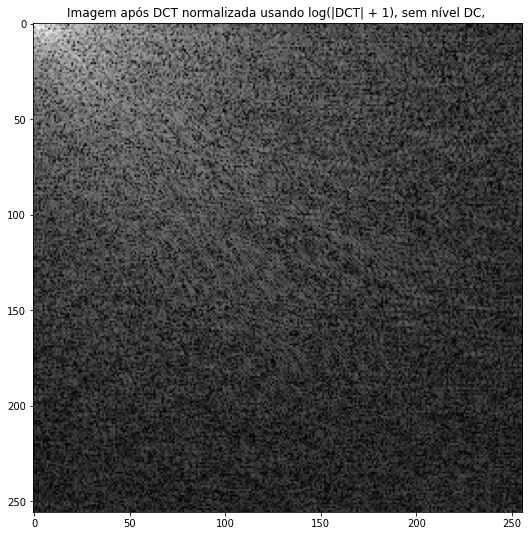

In [139]:
# Copia da imagem pós DCT para normalização.
# Copy post DCT image for normalization.
imgDCT_norm_log = imgDCT.copy()

# Aplicando normalização log(|DCT| + 1).
# Applying log(|DCT| + 1) normalization.
for i in range(imgDCT_norm_log.shape[0]):
    for j in range(imgDCT_norm_log.shape[1]):
        imgDCT_norm_log[i][j] = log(abs(imgDCT_norm_log[i][j]) + 1)

# Plotando.
# Plotting.
plt.figure(figsize=[90, 9])
plt.imshow(imgDCT_norm_log, cmap='gray')
plt.title("Imagem após DCT normalizada usando log(|DCT| + 1), sem nível DC, ")


In [140]:
# Frequência desejada para retorno.
# Desired frequency for return.
RxC = imgDCT.shape
while(True):
    freq = int(input('- Digite a frequência desejada: '))
    if freq < 0 or freq > ((RxC[0] * RxC[1]) - 1):
        print('- Valor inválido.')
        print('- A frequência deve estar no intervalo [0, RxC - 1].')
    else:
        break


- Digite a frequência desejada: 10000


In [141]:
# Criando um array para retorno da imagem via IDCT.
# Creating an array for image return via IDCT.
imgFreq = []

# Copiando imagens para realizar operações.
# Copying images to perform operations.
imgDCT_filtered = imgDCT.copy()

# Retornando com o nível DC.
# Returning with DC level.
imgDCT_norm[0][0] = dc_value

# Criando uma lista para comparação de valores.
# Creating a list for comparing values.
img_sort = list(np.ndenumerate(imgDCT_norm))

# Realizando ordenação (mais importantes) e adicionando a imgFreq.
# Performing sorting (most important) and adding to imgFreq.
def sortKey(e):
    return e[1]

img_sort.sort(key=sortKey)
img_sort = img_sort[:: -1]

# Adicionando valores no array da nova imagem.
# Adding values to the new image array.
for i in range(freq):
    imgFreq.append(img_sort[i][0])

# Adiciona o valor 0 ao componente DC.
# Add the value 0 to the DC component.
#imgFreq.insert(0, (0, 0))
#imgFreq.insert(0, dc_value)

# Função que compara valores importantes e zera os demais.
# Function that compares important values and resets the others.
@jit(nopython=True)
def comp_change(image_dct, image_freq):
    for i in range(image_dct.shape[0]): #adicionar @jit
        for j in range(image_dct.shape[1]):
            if (i, j) not in image_freq:
                image_dct[i][j] = 0

# Aplicando função na imagem filtrada.
# Applying function to filtered image.
comp_change(imgDCT_filtered, imgFreq)


In [142]:
# Aplicando IDCT na imagem filtrada, do passo anterior.
# Applying IDCT to the filtered image from the previous step.
imgIDCT = np.zeros(img.shape)

for i, line in enumerate(imgDCT_filtered):
    imgIDCT[i] = idct1d(line)

imgIDCT = imgIDCT.T

for i, line in enumerate(imgIDCT):
    imgIDCT[i] = idct1d(line)

imgIDCT = imgIDCT.T


Text(0.5, 1.0, 'Imagem após IDCT, 10000 amostra(s)')

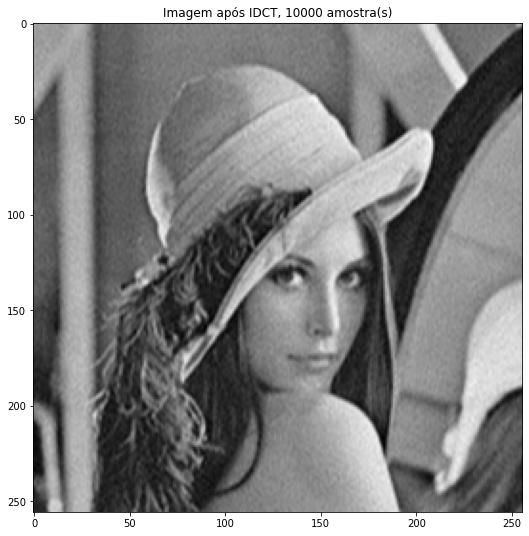

In [143]:
# Exibindo resultado da IDCT (Imagem vinda do domínio da frequência, calculada anteriormente).
# Displaying IDCT result (Image coming from the frequency domain, calculated previously).
plt.figure(figsize=[90, 9])
plt.imshow(imgIDCT, cmap='gray')
plt.title(f'Imagem após IDCT, {freq} amostra(s)')


Text(0.5, 1.0, 'Imagem após IDCT, 10000 amostra(s)')

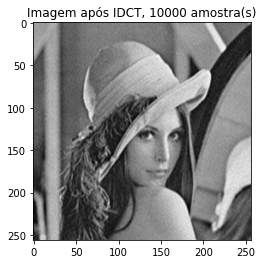

In [144]:
# Plotando em tamanho menor para comparação com imagem original.
# Plot in smaller size for comparison with original image.
plt.imshow(imgIDCT, cmap='gray')
plt.title(f'Imagem após IDCT, {freq} amostra(s)')


Text(0.5, 1.0, 'Imagem fornecida pelo professor com n = 100')

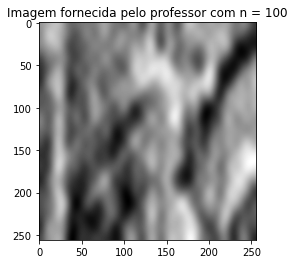

In [145]:
# Imagem exemplo fornecida pelo professor com n = 100.
# Sample image provided by the teacher with n = 100.
lena100 = Image.open('Lena_n100.png')
plt.imshow(lena100, cmap='gray')
plt.title('Imagem fornecida pelo professor com n = 100')


Text(0.5, 1.0, 'Imagem original')

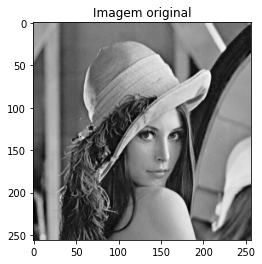

In [146]:
# Imagem original.
# Original image.
plt.imshow(img, cmap='gray')
plt.title(f'Imagem original')


#2. Tratando áudio
###2. Handling audio

In [60]:
# O retorno de SoundFile é um float entre -1 e 1 (como o matab, essa é a convenção para sinais de áudio).
# SoundFile return is a float between -1 and 1 (like matab, this is the convention for audio signals).
audio, samplerate = sf.read('MasEstamosAiPraMais.wav')

# Exibindo as amostras do áudio carregado e a frequência de amostragem.
print(f'''- Nº de amostras do áudio carregado: {len(audio)}
- Frequência de amostragem: {samplerate} Hz''')


- Nº de amostras do áudio carregado: 125204
- Frequência de amostragem: 44100 Hz


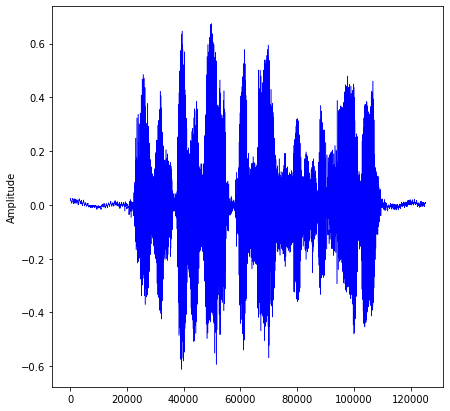

In [61]:
# Função para plotar o gráfico relacionado aos áudios.
# Function to plot the graph related to audios.
def plot_audio(data, figsize=[7, 7], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke, alpha=1, color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

plot_audio(audio)


In [62]:
# Reproduzindo áudio carregado.
# Playing loaded audio.
Audio(audio, rate=samplerate)


In [63]:
# Aplicando a DCT1D ao áudio.
# Applying DCT1D to audio.
audio_dct = dct1d(audio)


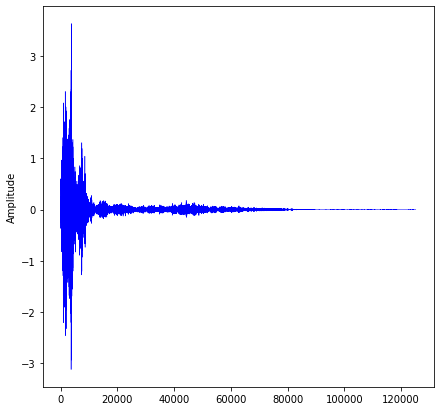

In [84]:
# Visualizando o audio no domínio da frequência (após DCT).
# Viewing audio in frequency domain (after DCT).
plot_audio(audio_dct)


In [85]:
# Calculando frequência de corte como 10% da maior frequência.
# Calculating cutoff frequency as 10% of highest frequency.
cutofffreq = (0.1) * len(audio)

# Filtro ideal (o qual não é tão bom) low-pass.
# Optimal (which is not so good) low-pass filter.
# Parâmetros: x = array NumPy e fc = freq. de corte. Parâmetro fc é opcional.
# Parameters: x = array NumPy and fc = freq. cutting. Parameter fc is optional.
def lp_filter(x, fc=cutofffreq):
    for i in range(0, len(x)):
        if i > fc:
            x[i] = 0
    
    return x


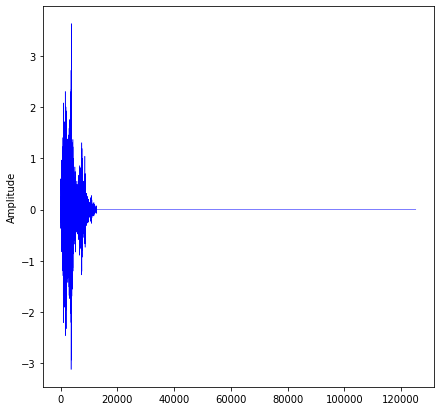

In [86]:
# Aplicando o filtro a uma cópia do áudio pós DCT.
# Applying the filter to a post DCT audio copy.
audio_dct_filtered = audio_dct.copy()
audio_dct_filtered = lp_filter(audio_dct_filtered)
plot_audio(audio_dct_filtered)


Ganho a ser aplicado aos graves:
\begin{equation}
\mathrm{Y}=g \frac{1}{\sqrt{1+\left(\frac{k}{f c}\right)^{2 n}}}+1
\end{equation}  
Em que g controla o ganho (g = 0.5 é 50% de ganho máximo), fc é a frequência de corte (adimensional) e n é a ordem do filtro.

In [93]:
# Função de ganho para frequências baixas (abaixo da frequência de corte).
# Gain function for low frequencies (below cutoff frequency).
def inc_bass(audio_data, g, n, fc=cutofffreq):
    for k in range(0, len(audio_data)):
        y = g * (1 / sqrt(1 + ((k / fc)**(2*n)))) + 1
        audio_data[k] = audio_data[k] * y


In [104]:
# Criando uma cópia do áudio filtrado pós DCT.
# Creating a copy of the post DCT filtered audio.
audio_dct_filtered_bass_boosted = audio_dct_filtered.copy()

# Aplicando ganho Y no áudio.
# Applying Y gain to audio.
inc_bass(audio_dct_filtered_bass_boosted, 0.5, 3)


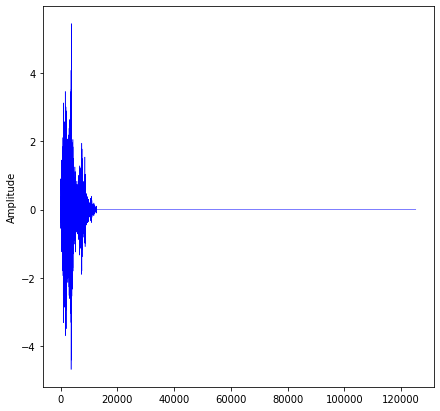

In [106]:
# Plotando o áudio pós ganho.
# Plotting audio after gain.
plot_audio(audio_dct_filtered_bass_boosted)


In [107]:
# Aplicando IDCT no áudio filtrado, após DCT e com ganho aplicado.
# Applying IDCT to filtered audio, after DCT and with gain applied.
audio_bass_boosted = idct1d(audio_dct_filtered_bass_boosted)


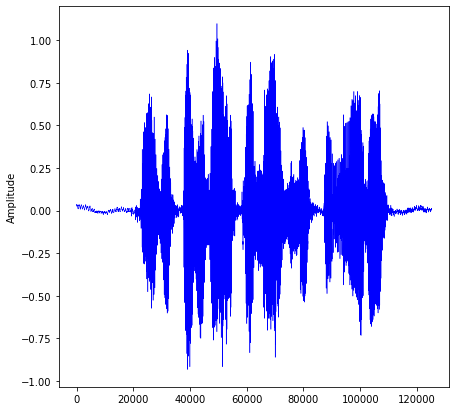

In [108]:
# Plotando o áudio pós IDCT.
# Plotting audio after IDCT.
plot_audio(audio_bass_boosted)


### - Comparando resultados entre o áudio original e o áudio processado*.
##### - Comparing results between original and processed audio*.
---
\* DCT, filtro Low-pass, ganho, IDCT.

\* DCT, Low-pass filter, gain, IDCT.

In [116]:
# Áudio original.
# Original audio.
print('- Áudio original.\n')
Audio(audio, rate=samplerate)


- Áudio original.



In [117]:
# Áudio filtrado com ganho aplicado.
# Audio filtered with gain applied.
print('- Áudio pós processado.\n')
Audio(audio_bass_boosted, rate=samplerate)


- Áudio pós processado.



In [ ]:
# Salvar áudio pós processado.
# Save post-processed audio.
#sf.write('audio_bassboosted.wav', audio_bass_boosted, samplerate)
